In [38]:
# import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# read the dataset and display some rows
dataset = pd.read_csv('Dataset/Dataset.csv')
dataset.head()

TIMESTAMP  A    B  C
0  2022032101  0  208  0
1  2022032103  0  225  0
2  2022032104  0  223  0
3  2022032104  0  221  0
4  2022032105  0  221  0

In [39]:
# find length of dataset
len(dataset)

28735

In [40]:
# describe the info about data
dataset.describe()

TIMESTAMP             A             B             C
count  2.873500e+04  28735.000000  28735.000000  28735.000000
mean   2.022073e+09      3.567844    289.962624    441.588759
std    1.911921e+04      3.551819     39.252154    454.408925
min    2.022032e+09      0.000000    172.000000      0.000000
25%    2.022060e+09      0.000000    259.000000      0.000000
50%    2.022072e+09      3.000000    297.000000    725.000000
75%    2.022091e+09      7.000000    319.000000    860.000000
max    2.022103e+09      9.000000    434.000000   5932.000000

In [41]:
# find either there are any null values
dataset.isnull().sum()

TIMESTAMP    0
A            0
B            0
C            0
dtype: int64

In [42]:
dataset.columns

Index(['TIMESTAMP', 'A', 'B', 'C'], dtype='object')

In [43]:
# change date into the required date time stamp
from datetime import datetime
dataset['TIMESTAMP'] = dataset['TIMESTAMP'].astype(str).apply(lambda x: datetime.strptime(x, "%Y%m%d%H"))
dataset.head()

TIMESTAMP  A    B  C
0 2022-03-21 01:00:00  0  208  0
1 2022-03-21 03:00:00  0  225  0
2 2022-03-21 04:00:00  0  223  0
3 2022-03-21 04:00:00  0  221  0
4 2022-03-21 05:00:00  0  221  0

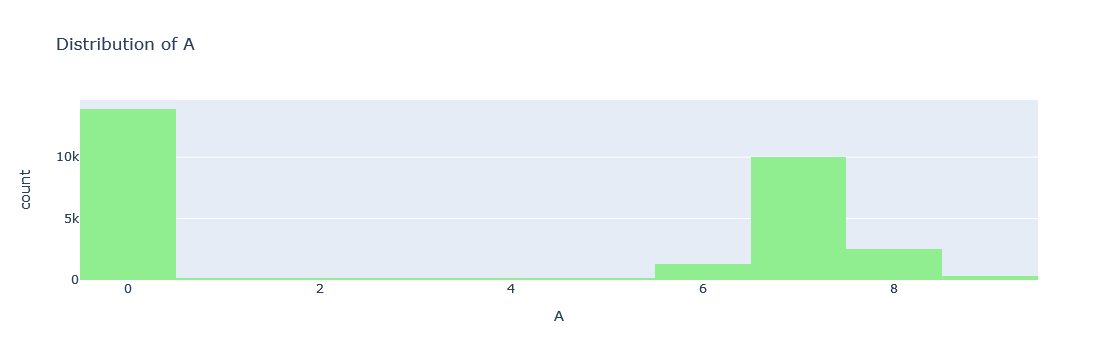

In [44]:
# lets plot a histogram to interpret vairable A
fig = px.histogram(dataset, x = 'A', nbins = 10, title = 'Distribution of A', color_discrete_sequence = ['lightgreen'], height = 500)
fig.show()

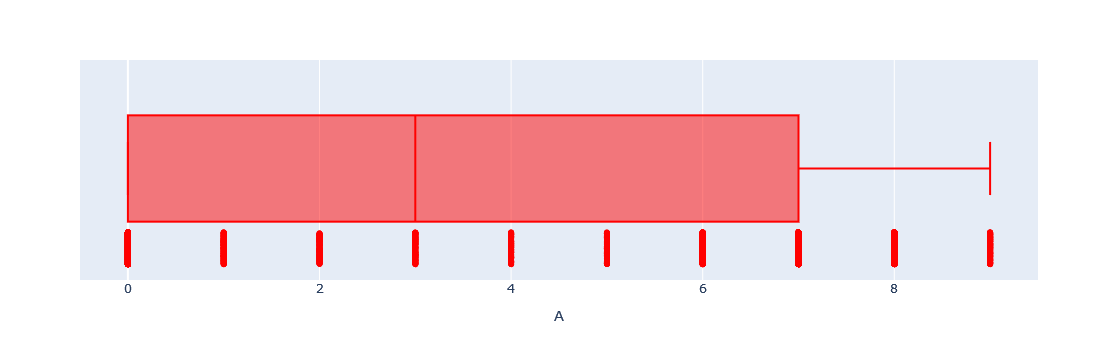

In [45]:
# the data in A column does not seems to be normal so lets plot a boxplot to see more about data
color = 'red'
fig = px.box(dataset, x = 'A', points = 'all', color_discrete_sequence = [color])
fig.show()

In [46]:
# now find outliers and other features of boxplot
data = dataset['A']

# find max and min
max_no = np.max(data)
min_no = np.min(data)

# now find percentiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

# find inter quartile range
IQR = q3 - q1

L_bound = q1 - 1.5*IQR
U_bound = q3 + 1.5*IQR

# find outliers
Outliers = [] 
for i in data:
    if i < L_bound or i > U_bound:
        Outliers.append(i)
if len(Outliers) == 0:
    print("Woo! There are no outliers!")
else:
    print("Potential Outliers are ", Outliers)
        

Woo! There are no outliers!


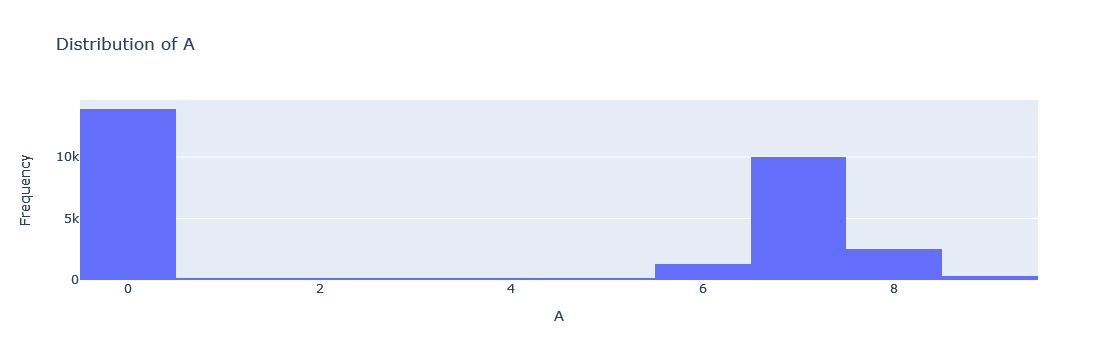

In [47]:
# find desnsity plot which is quite smooother than histogram
fig = go.Figure()
fig.add_trace(go.Histogram(x = dataset['A'], histnorm = 'density'))
fig.update_layout(title = 'Distribution of A', xaxis_title = 'A', yaxis_title = 'Frequency')
fig.show()

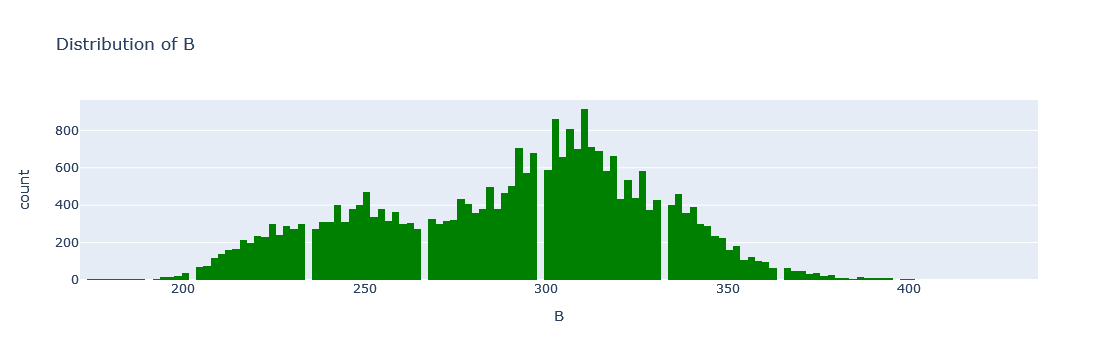

In [48]:
# plot histogram for variable B
fig = px.histogram(dataset, x = 'B', title = 'Distribution of B', color_discrete_sequence = ['green'], height = 500)
fig.show()

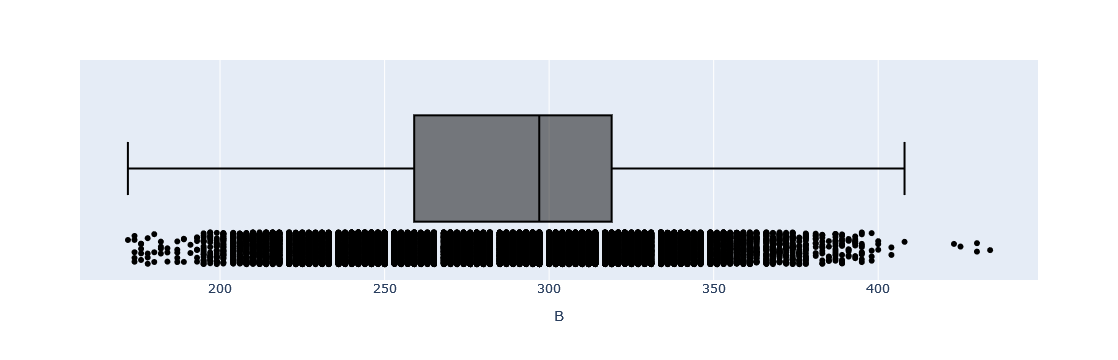

In [49]:
# lets plot a boxplot and see more information about distribution
fig = px.box(dataset, x = 'B', points = 'all', color_discrete_sequence = ['black'])
fig.show()

In [50]:
# find outliers if there are any
data = dataset['B']
min_value = np.min(data)
max_value = np.max(data)

q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

IQR = q3 - q1

Lower_bound = q1 - 1.5*IQR
Upper_bound = q3 + 1.5*IQR

# for loop to find outliers
outliers = []
for i in data:
    if i < Lower_bound or i > Upper_bound:
        outliers.append(i)
if len(outliers) == 0:
    print("Wow! There are no outliers!")
else:
    print("Outliers are ", np.sort(outliers))

Outliers are  [423 425 430 430 434]


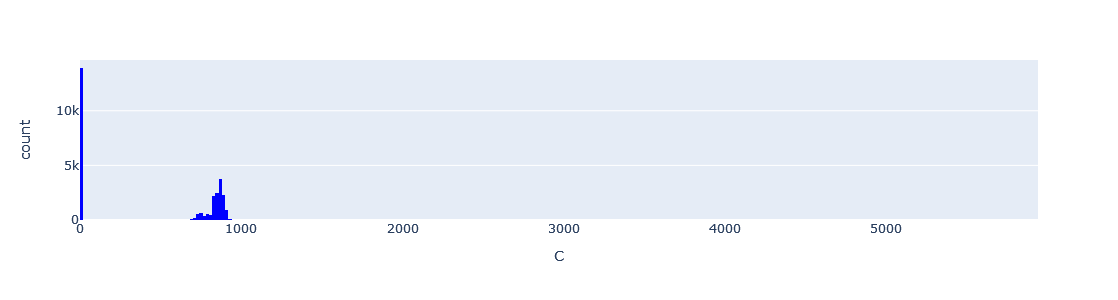

In [51]:
# plot histogram for C
fig = px.histogram(dataset, x = 'C', title = '', color_discrete_sequence = ['blue'], height = 300)
fig.show()

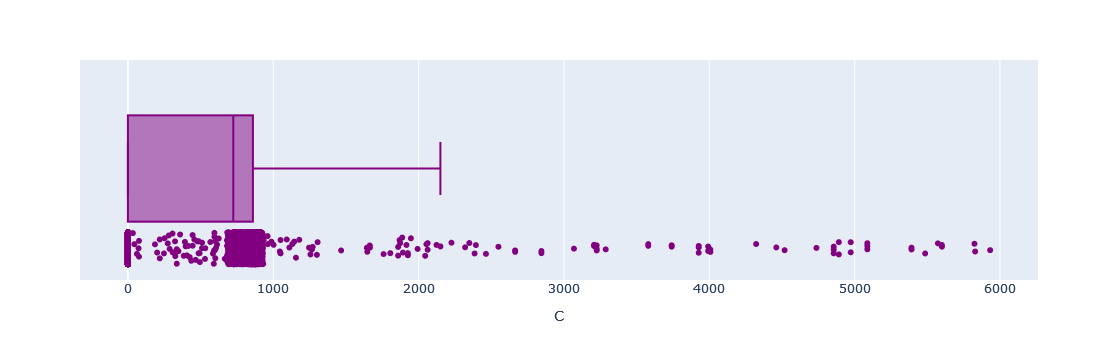

In [52]:
# boxplot for C
fig = px.box(dataset, x = 'C', points = 'all', color_discrete_sequence = ['purple'])
fig.show()

In [53]:
# now find out outliers and percentiles
data = dataset['C']

# find minimum and maximum value
max_value = np.max(data)
min_value = np.min(data)

# now find out percentiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

# now find inter quartile range
IQR = q3 - q1

# find lower and upper bounds
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

# find outliers
outliers = []
for i in data:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
if len(outliers) == 0:
    print("Wow! There are no outliers!")
else:
    print("Potential outliers are ", np.sort(outliers))

Potential outliers are  [2226 2320 2349 2385 2394 2463 2549 2664 2664 2845 2845 3069 3207 3207
 3225 3225 3225 3287 3580 3580 3741 3741 3927 3927 3927 3992 3992 4007
 4007 4322 4461 4518 4737 4856 4856 4856 4891 4891 4973 4973 5087 5087
 5087 5391 5391 5485 5573 5600 5600 5824 5829 5932]


In [54]:
# find correlation between A and B

# specify data
x = dataset['A']
y = dataset['B']

# find means of data
x_mean = np.mean(x)
y_mean = np.mean(y)

# declare numerator and denominator
numerator = np.sum((x-x_mean)*(y - y_mean))
denominator = np.sqrt(np.sum((x-x_mean)**2)*np.sum((y-y_mean)**2))

# find correlation
corr = numerator/denominator
print("Pearson correlation between variable A and B is", corr)

Pearson correlation between variable A and B is 0.6463010091182791


In [55]:
# find correlation between B and C

# specify data
z = dataset['C']

# calculate mean
z_mean = np.mean(z)

num = np.sum((y - y_mean)*(z -z_mean))
deno = np.sqrt(np.sum((y-y_mean)**2)*np.sum((z-z_mean)**2))

# pearson correlation
correlation = num/deno
print("Pearson correaltion of B and C is", correlation)

Pearson correaltion of B and C is 0.603630905394911


In [56]:
# calculate correlation between A and C
numm = np.sum((x-x_mean)*(z-z_mean))
denoo = np.sqrt(np.sum((x-x_mean)**2)*np.sum((z-z_mean)**2))

corre = numm/denoo

print("Pearson correlation between A and C is", corre)

Pearson correlation between A and C is 0.8878512873663851


### There is strong positive correlation between variables A and C and moderate correlation between B & C and A & B

In [57]:
# find data types of varibales
dataset.dtypes

TIMESTAMP    datetime64[ns]
A                     int64
B                     int64
C                     int64
dtype: object

In [58]:
# now lets apply a t test

# define hypothesis
null_hypothesis = '"There is no difference of means between the groups!"'
alternate_hypothesis = '"There is significant of means difference between the groups"'
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(x, y)

# interpret the results
if p_value < 0.05:
    print("Null hypothesis which says " + null_hypothesis + " is rejected!")
else:
    print("Failed to reject null hypothesis which says ", null_hypothesis)
print("Number of standard deviations the two means are apart are", t_stat)

Null hypothesis which says "There is no difference of means between the groups!" is rejected!
Number of standard deviations the two means are apart are -1231.7893756134094


In [59]:
# now lets apply a t test

# define hypothesis
null_hypothesis = '"There is no difference of means between the groups!"'
alternate_hypothesis = '"There is significant of means difference between the groups"'
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(y, z)

# interpret the results
if p_value < 0.05:
    print("Null hypothesis which says " + null_hypothesis + " is rejected!")
else:
    print("Failed to reject null hypothesis which says ", null_hypothesis)
print("Number of standard deviations the two means are apart are", t_stat)

Null hypothesis which says "There is no difference of means between the groups!" is rejected!
Number of standard deviations the two means are apart are -56.353196807142176


In [60]:
# now lets apply a t test

# define hypothesis
null_hypothesis = '"There is no difference of means between the groups!"'
alternate_hypothesis = '"There is significant of means difference between the groups"'
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(x, z)

# interpret the results
if p_value < 0.05:
    print("Null hypothesis which says " + null_hypothesis + " is rejected!")
else:
    print("Failed to reject null hypothesis which says ", null_hypothesis)
print("Number of standard deviations the two means are apart are", t_stat)

Null hypothesis which says "There is no difference of means between the groups!" is rejected!
Number of standard deviations the two means are apart are -163.39558955437087


In [61]:
# perform anova test for all three variables
f_stat, p_value = stats.f_oneway(x, y, z)

if p_value < 0.05:
    print("Null hypothesis which says " + null_hypothesis + " is rejected!")
else:
    print("Failed to reject null hypothesis which says ", null_hypothesis)
print(f_stat)

Null hypothesis which says "There is no difference of means between the groups!" is rejected!
20502.459038997607


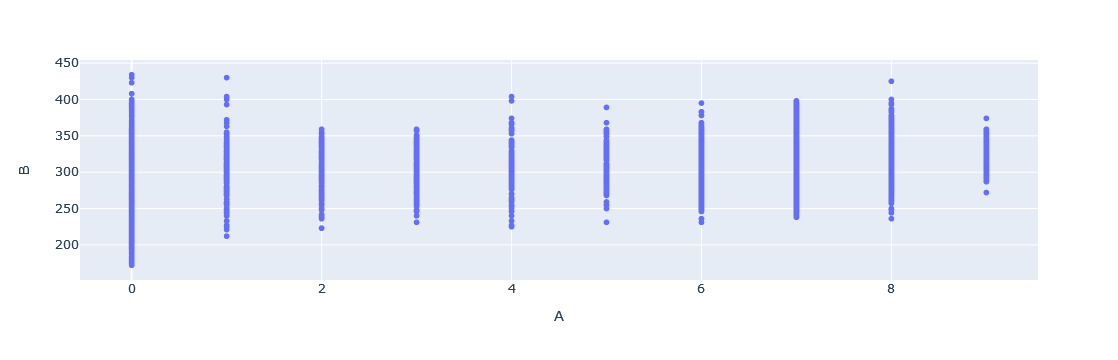

In [62]:
# challenge: whether variable A predicts variable B or not
# plot a scatter graph to find out relationship between A and B
fig = px.scatter(dataset, x = x, y = y)
fig.show()

In [63]:
# lets have hypothesis
null_hypothesis = 'A does not predict B'
alternate_hypothesis = 'A predicts B'

# find correlation between A and B
# specify data
x = dataset['A']
y = dataset['B']

# find means of data
x_mean = np.mean(x)
y_mean = np.mean(y)

# declare numerator and denominator
numerator = np.sum((x-x_mean)*(y - y_mean))
denominator = np.sqrt(np.sum((x-x_mean)**2)*np.sum((y-y_mean)**2))

# find correlation
corr = numerator/denominator
print("Pearson correlation between variable A and B is", corr)

Pearson correlation between variable A and B is 0.6463010091182791


In [64]:
# lets apply regression model
from sklearn.model_selection import train_test_split
x = x.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

pred = model.predict(x_test)

from sklearn.metrics import r2_score
print("r2 is", r2_score(y_test, pred))

r2 is 0.42715155817293005


In [67]:
# perform t test
from scipy.stats import ttest_ind

A = dataset['A']
B = dataset['B']
null_hypothesis = "'A does not predict B'"
alternate_hypothesis = "'A predicts B'"

t_statistics, p_value = ttest_ind(A, B)
print('p_value is', p_value)

if p_value < 0.05:
    print("Rejected null hypothesis which says:", null_hypothesis)
else:
    print("Failed to reject null hypothesis which says:", null_hypothesis)

p_value is 0.0
Rejected null hypothesis which says: 'A does not predict B'
